In [41]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
# 데이터 불러오기 
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [22]:
# datetime 컬럼을 datetime 타입으로 변환
train_dataset['datetime'] = pd.to_datetime(train_dataset['datetime'])
test_dataset['datetime'] = pd.to_datetime(test_dataset['datetime'])

# datetime에서 유용한 특성 추출
train_dataset['year'] = train_dataset['datetime'].dt.year
train_dataset['month'] = train_dataset['datetime'].dt.month
train_dataset['day'] = train_dataset['datetime'].dt.day
train_dataset['hour'] = train_dataset['datetime'].dt.hour
train_dataset['dayofweek'] = train_dataset['datetime'].dt.dayofweek

test_dataset['year'] = test_dataset['datetime'].dt.year
test_dataset['month'] = test_dataset['datetime'].dt.month
test_dataset['day'] = test_dataset['datetime'].dt.day
test_dataset['hour'] = test_dataset['datetime'].dt.hour
test_dataset['dayofweek'] = test_dataset['datetime'].dt.dayofweek


In [23]:
train_dataset.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
test_dataset.drop(['datetime'], axis=1, inplace=True)
print(train_dataset.head())
print(test_dataset.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  year  month  day  hour  dayofweek  
0     16  2011      1    1     0          5  
1     40  2011      1    1     1          5  
2     32  2011      1    1     2          5  
3     13  2011      1    1     3          5  
4      1  2011      1    1     4          5  
   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0

In [42]:
print(train_dataset.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour',
       'dayofweek'],
      dtype='object')


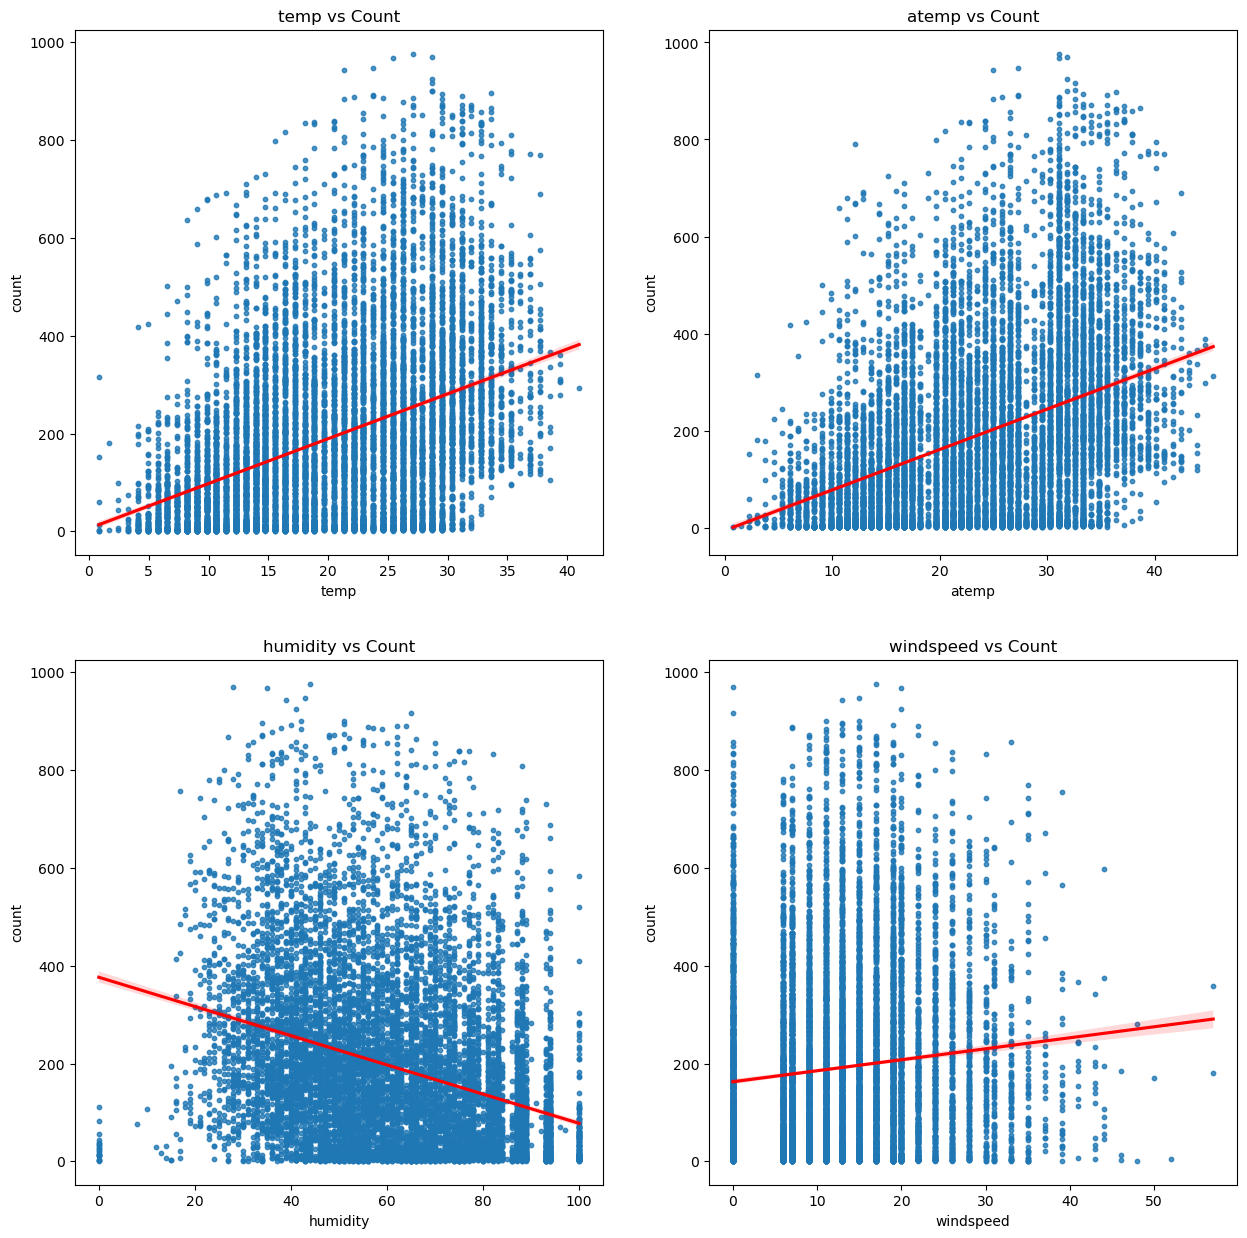

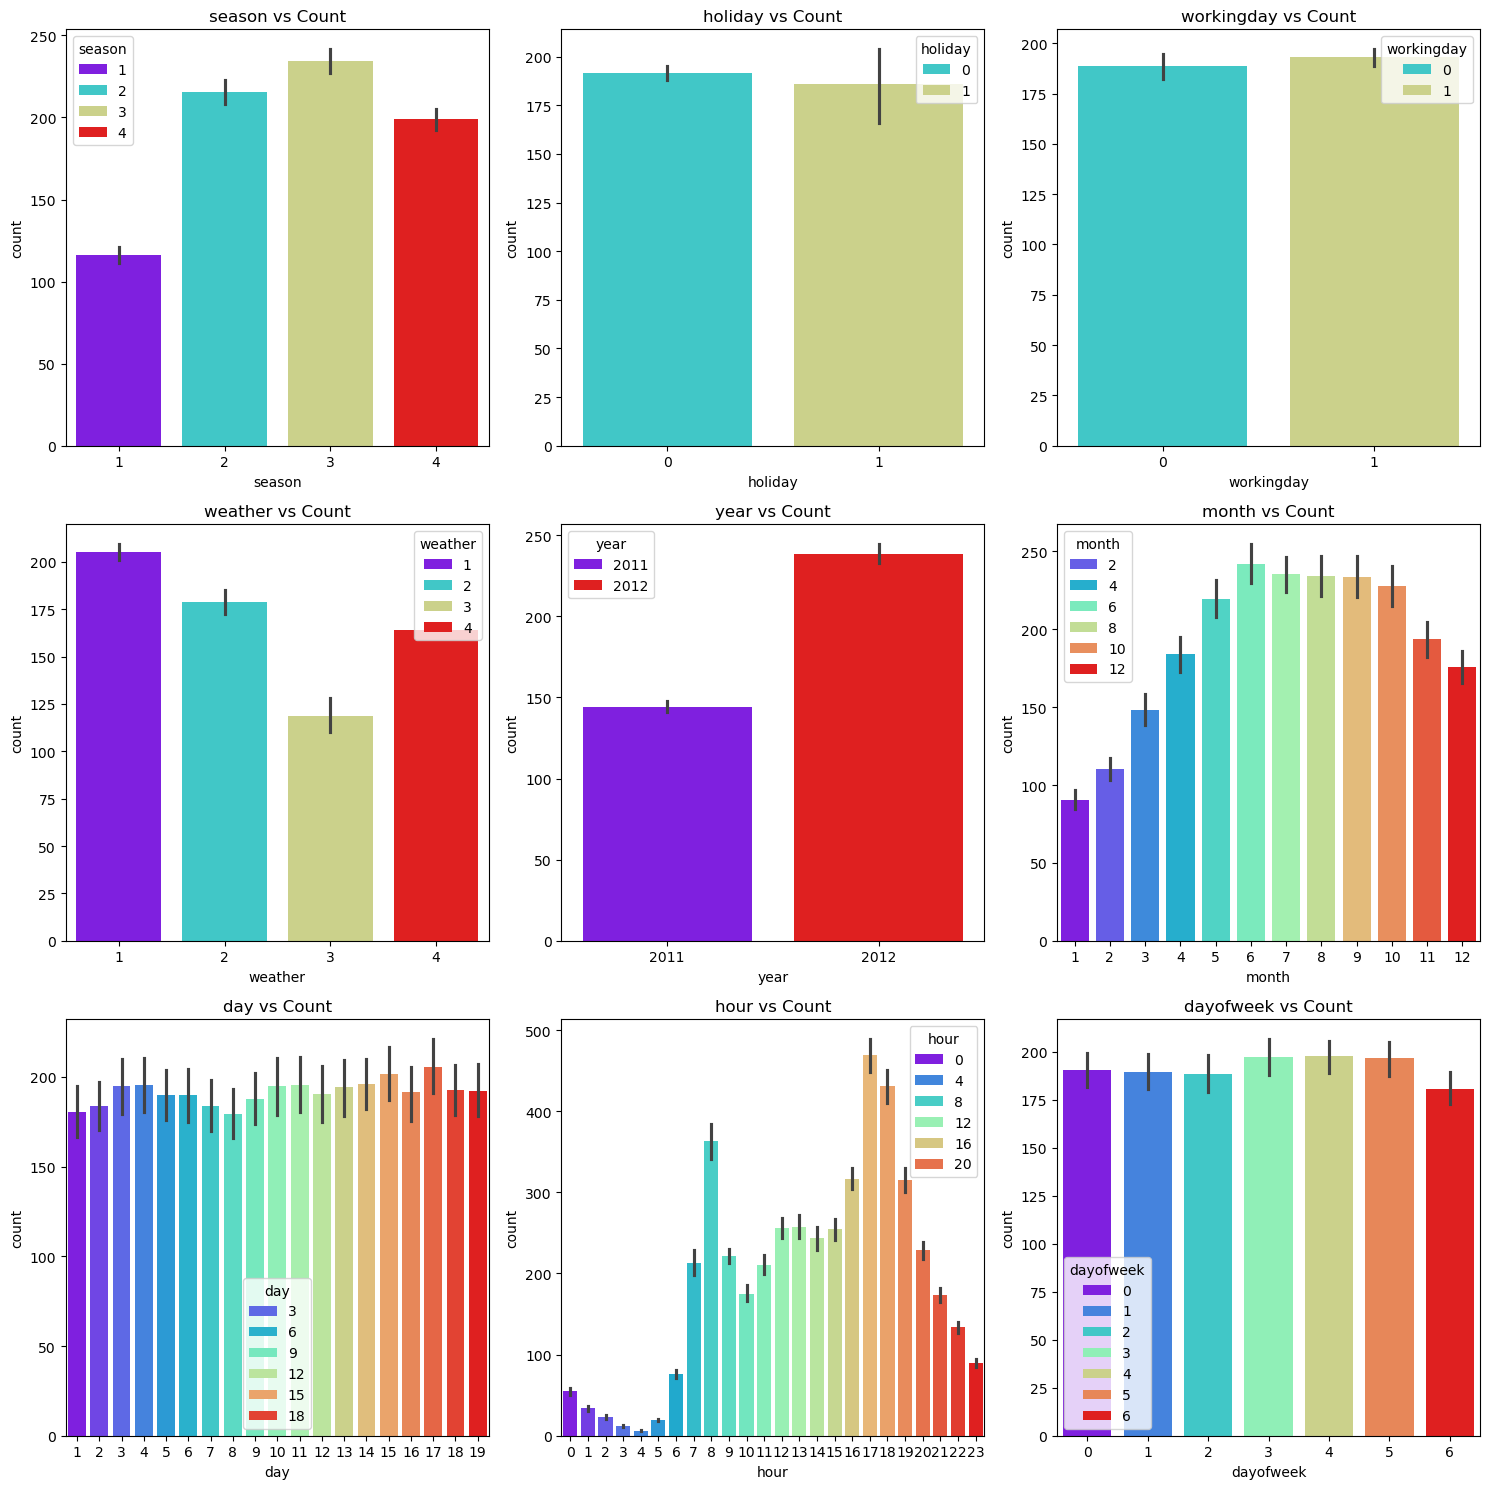

In [48]:
# 다른 모든 column과 count 간의 관계를 시각화해서 살펴보자
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed']
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour', 'dayofweek']

plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=col, y='count', data=train_dataset, scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'{col} vs Count')
    
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=col, y='count', hue=col, data=train_dataset, palette='rainbow')
    plt.title(f'{col} vs Count')

plt.tight_layout()
plt.show()

In [49]:
# workingday, day, dayofweek : 별차이없음
# year: 2년치가 데이터가 너무 적음
# temp와 atemp는 거의 유사 둘중 하나만 사용

train_dataset.drop(['atemp','workingday','day','dayofweek','year'], axis=1, inplace=True)
test_dataset.drop(['atemp','workingday','day','dayofweek','year'], axis=1, inplace=True)
print(train_dataset.head())
print(test_dataset.head())

   season  holiday  weather  temp  humidity  windspeed  count  month  hour
0       1        0        1  9.84        81        0.0     16      1     0
1       1        0        1  9.02        80        0.0     40      1     1
2       1        0        1  9.02        80        0.0     32      1     2
3       1        0        1  9.84        75        0.0     13      1     3
4       1        0        1  9.84        75        0.0      1      1     4
   season  holiday  weather   temp  humidity  windspeed  month  hour
0       1        0        1  10.66        56    26.0027      1     0
1       1        0        1  10.66        56     0.0000      1     1
2       1        0        1  10.66        56     0.0000      1     2
3       1        0        1  10.66        56    11.0014      1     3
4       1        0        1  10.66        56    11.0014      1     4


In [ ]:
train_numerical_cols = ['temp', 'humidity', 'windspeed']
train_categorical_cols = ['season', 'holiday', 'weather', 'month', 'hour']

dummy = []
for col in train_categorical_cols:
    dummya.append
season = pd.get_dummies(train['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train['hour'],prefix='hour',drop_first=True)
train = pd.concat([train,season,weather,holiday,month,hour],axis=1)
train.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)
train.head()


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)